# Data Plotting and Fitting Exercise

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

In [1]:
def linearFit(t, m, b): 
    return m*t + b

def expDecay(t, a, b, c):
    return a*np.exp(-b*t) + c

def gaussianWithOffset(t, a, c, s):
    return a*np.exp(-((t-c)**2)/(2*s**2))

Now I read in the needed data file; the "skiprows" parameter allows
me to ignore the header line which labels the columns.

In [35]:
data = np.genfromtxt('002data.txt', skip_header=1)

This command extracts the first column of data;
python indexes starting at zero, so be careful!

In [36]:
data[ : ,0]  

array([ 0.015,  0.172,  0.329,  0.486,  0.643,  0.8  ,  0.958,  1.115,
        1.272,  1.429,  1.586,  1.743,  1.9  ,  2.057,  2.214,  2.317,
        2.528,  2.685,  2.843,  3.   ])

In [37]:
x = data[ : ,0]
z = data[ : ,1]
u = data[ : ,2]
v = data[ : ,3]
y = data[ : ,4]
eVar = data[ : ,5]



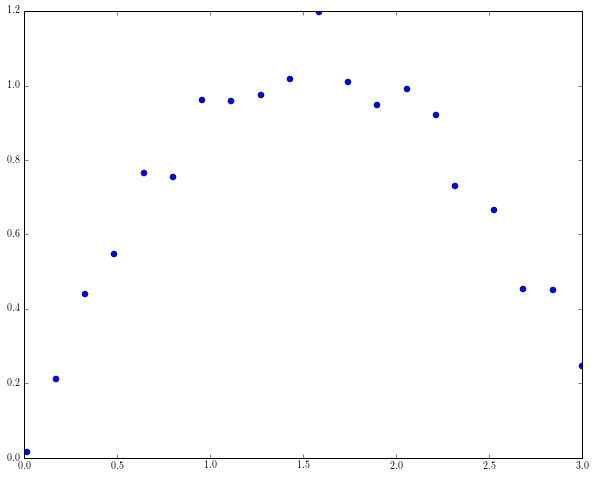

In [50]:
plt.plot(x,y,'o')

plt.show()

In [53]:
fitParams, fitCovariances = curve_fit(gaussianWithOffset, x, y)
print(fitParams)
print(fitCovariances)

[ 1.10721112  1.57239239  0.87295933]
[[  1.31089084e-03  -3.30561329e-05  -8.56876102e-04]
 [ -3.30561329e-05   1.11606236e-03   6.74304857e-05]
 [ -8.56876102e-04   6.74304857e-05   1.48324147e-03]]


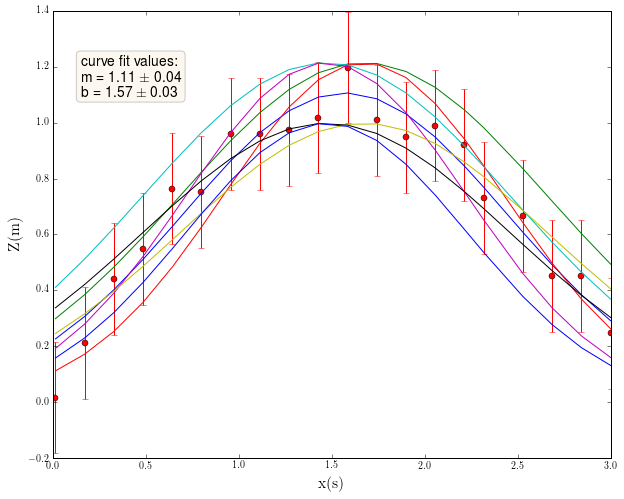

In [62]:
plt.ylabel(r'$\mathrm{Z (m)}$', fontsize = 16)
plt.xlabel(r'$\mathrm{x (s)}$', fontsize = 16)
#plt.xlim(0,3.5)
# plot the data as red circles with errorbars in the vertical direction
plt.errorbar(x, y, fmt = 'ro', yerr = 0.2)
# now plot the best fit curve and also +- 3 sigma curves
# the square root of the diagonal covariance matrix element 
# is the uncertianty on the corresponding fit parameter.
sigma = np.sqrt([fitCovariances[0,0], fitCovariances[1,1], fitCovariances[2,2]])

plt.plot(x, gaussianWithOffset(x, fitParams[0], fitParams[1], fitParams[2]),\
         x, gaussianWithOffset(x, fitParams[0] + 3*sigma[0], fitParams[1] + 3*sigma[1], fitParams[2] + 3*sigma[2]),\
         x, gaussianWithOffset(x, fitParams[0] + 3*sigma[0], fitParams[1] + 3*sigma[1], fitParams[2] - 3*sigma[2]),\
         x, gaussianWithOffset(x, fitParams[0] + 3*sigma[0], fitParams[1] - 3*sigma[1], fitParams[2] + 3*sigma[2]),\
         x, gaussianWithOffset(x, fitParams[0] + 3*sigma[0], fitParams[1] - 3*sigma[1], fitParams[2] - 3*sigma[2]),\
         x, gaussianWithOffset(x, fitParams[0] - 3*sigma[0], fitParams[1] + 3*sigma[1], fitParams[2] + 3*sigma[2]),\
         x, gaussianWithOffset(x, fitParams[0] - 3*sigma[0], fitParams[1] - 3*sigma[1], fitParams[2] + 3*sigma[2]),\
         x, gaussianWithOffset(x, fitParams[0] - 3*sigma[0], fitParams[1] - 3*sigma[1], fitParams[2] - 3*sigma[2]),\
         )
props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
plt.text(0.15, 1.1, 
    ("curve fit values:\n m = %.2f\t $\pm$ %.2f\n b = %.2f\t $\pm$ %.2f" 
    % (fitParams[0], sigma[0], fitParams[1], sigma[1])), fontsize=14,bbox=props )

# save plot to a file
#plt.savefig('dataFitted.png', bbox_inches=0, dpi=600)
plt.show()